In [1]:
!pip install catboost
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.6 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'drive/MyDrive/Skripsi/citarum.csv')

In [4]:
#Dropping unnecessary columns
cols_to_drop = ['Measuring_Point', 'Date', 'Temperatur', 'Debit']
df = df.drop(cols_to_drop, axis=1)
df.head()

,TDS,TSS,NH3,Surfactant,Phenol,Phospate,BOD,COD,OG,NO3,DO,pH,Cl3,Fecal_Coliform,Total_Coliform,Class
0,81.0,35.0,0.025,740.0,40.0,0.040,3.89,18.41,1000.0,1.12,7.04,7.79,0.01,24000,30000,4
1,254.0,20.0,0.060,60.0,1.0,0.006,0.16,0.49,1000.0,0.17,6.72,7.13,0.01,80000,110000,4
2,208.0,61.0,0.040,60.0,1.0,0.060,2.81,5.76,1000.0,1.76,5.77,6.77,0.01,160000,160000,4
3,220.0,35.0,0.100,290.0,50.0,0.120,3.03,37.40,1000.0,1.21,6.20,7.72,0.01,24000,30000,4
4,148.0,32.0,0.025,120.0,70.0,0.070,3.04,12.80,1000.0,1.36,8.80,6.96,0.01,50000,110000,4


In [5]:
#Seperating X & y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29)

In [7]:
#Applying data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Empty result dataframe
res = pd.DataFrame(index=['precision','recall','f1-score','accuracy'])

In [9]:
#Result Function
def result(clf, Classifier_Name, X_train, X_test):
  #Model Fitting
  clf.fit(X_train, y_train)
  
  #Showing performance result
  y_pred=clf.predict(X_test)
  from sklearn.metrics import classification_report
  clf_res = classification_report(y_test, y_pred, output_dict=True)

  #Append classifier result to result DataFrame
  res[str(Classifier_Name)] = [clf_res['weighted avg']['precision'],
                               clf_res['weighted avg']['recall'], 
                               clf_res['weighted avg']['f1-score'], 
                               clf_res['accuracy']]
  display(res)

  #Creating confusion matrix illustration
  from sklearn.metrics import ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, xticks_rotation="vertical", 
    display_labels=['Unsuitable', 'Very Poor', 'Poor', 'Good', 'Excellent'])
  disp.ax_.set_title("Confusion Matrix for " + str(Classifier_Name) + " Classifier")

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

,Decision Tree
precision,0.846475
recall,0.882353
f1-score,0.864024
accuracy,0.882353


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8333333333333334, 0.8695652173913043, 0.782...",0.862319,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.073099,0.056874,0.028437
14,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)","[0.8333333333333334, 0.8695652173913043, 0.826...",0.871014,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",0.059608,0.046377,0.023188
13,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14)","[0.8333333333333334, 0.8695652173913043, 0.826...",0.87971,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14)",0.063333,0.049275,0.024638
12,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13)","[0.8333333333333334, 0.8260869565217391, 0.826...",0.862319,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13)",0.053341,0.041501,0.02075
11,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13)","[0.8333333333333334, 0.8695652173913043, 0.826...",0.871014,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13)",0.059608,0.046377,0.023188
10,"(0, 2, 3, 6, 7, 8, 9, 10, 11, 13)","[0.8333333333333334, 0.8695652173913043, 0.826...",0.888406,"(0, 2, 3, 6, 7, 8, 9, 10, 11, 13)",0.081961,0.063768,0.031884
9,"(0, 2, 3, 6, 7, 8, 9, 10, 13)","[0.8333333333333334, 0.8695652173913043, 0.826...",0.888406,"(0, 2, 3, 6, 7, 8, 9, 10, 13)",0.073949,0.057535,0.028767
8,"(0, 2, 3, 6, 7, 8, 9, 13)","[0.8333333333333334, 0.8695652173913043, 0.826...",0.888406,"(0, 2, 3, 6, 7, 8, 9, 13)",0.081961,0.063768,0.031884
7,"(0, 2, 6, 7, 8, 9, 13)","[0.875, 0.8695652173913043, 0.8260869565217391...",0.896739,"(0, 2, 6, 7, 8, 9, 13)",0.075234,0.058534,0.029267
6,"(2, 6, 7, 8, 9, 13)","[0.875, 0.8695652173913043, 0.8695652173913043...",0.905435,"(2, 6, 7, 8, 9, 13)",0.064265,0.05,0.025


('2', '7', '8')

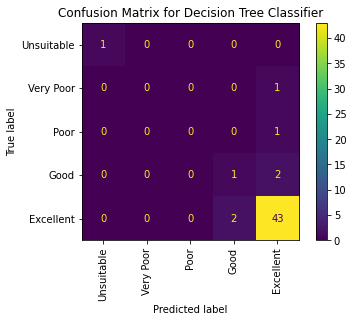

In [10]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#Wrapper Feature Selection
#from sklearn.feature_selection import SequentialFeatureSelector
#sfs_dt = SequentialFeatureSelector(dt_clf, direction='backward')
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_dt = SequentialFeatureSelector(dt_clf, forward=False, k_features="best")
sfs_dt.fit(X_train, y_train)
X_train_dt = sfs_dt.transform(X_train)
X_test_dt = sfs_dt.transform(X_test)

#Display Result
result(dt_clf, "Decision Tree", X_train_dt, X_test_dt)

#Creating selected features dataframe with corresponding column names
display(pd.DataFrame.from_dict(sfs_dt.get_metric_dict()).T)
display(sfs_dt.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

,Decision Tree,Random Forest
precision,0.846475,0.829932
recall,0.882353,0.901961
f1-score,0.864024,0.864414
accuracy,0.882353,0.901961


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.875, 0.9130434782608695, 0.9130434782608695...",0.91413,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.033178,0.025814,0.012907
14,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)","[0.875, 0.9130434782608695, 0.9130434782608695...",0.905435,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",0.019559,0.015217,0.007609
13,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)","[0.875, 0.9565217391304348, 0.8695652173913043...",0.91413,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",0.048476,0.037716,0.018858
12,"(2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14)","[0.9166666666666666, 0.8695652173913043, 0.956...",0.922464,"(2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14)",0.04161,0.032374,0.016187
11,"(2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14)","[0.875, 0.8695652173913043, 0.8695652173913043...",0.91413,"(2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14)",0.069629,0.054174,0.027087
10,"(2, 3, 4, 5, 6, 7, 8, 12, 13, 14)","[0.875, 0.9130434782608695, 0.9130434782608695...",0.91413,"(2, 3, 4, 5, 6, 7, 8, 12, 13, 14)",0.033178,0.025814,0.012907
9,"(2, 3, 4, 5, 6, 8, 12, 13, 14)","[0.875, 0.8695652173913043, 0.9565217391304348...",0.91413,"(2, 3, 4, 5, 6, 8, 12, 13, 14)",0.048476,0.037716,0.018858
8,"(2, 4, 5, 6, 8, 12, 13, 14)","[0.875, 0.8695652173913043, 0.9130434782608695...",0.91413,"(2, 4, 5, 6, 8, 12, 13, 14)",0.048476,0.037716,0.018858
7,"(2, 4, 5, 8, 12, 13, 14)","[0.875, 0.9130434782608695, 0.9130434782608695...",0.91413,"(2, 4, 5, 8, 12, 13, 14)",0.033178,0.025814,0.012907
6,"(2, 5, 8, 12, 13, 14)","[0.875, 0.9130434782608695, 0.9130434782608695...",0.922826,"(2, 5, 8, 12, 13, 14)",0.039613,0.030821,0.01541


('2', '8', '12')

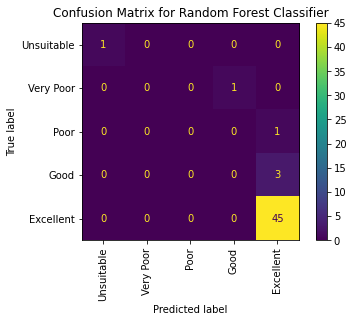

In [11]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Wrapper Feature Selection
sfs_rf = SequentialFeatureSelector(rf_clf, forward=False, k_features="best")
sfs_rf.fit(X_train, y_train)
X_train_rf = sfs_rf.transform(X_train)
X_test_rf = sfs_rf.transform(X_test)

#Display Result
result(rf_clf, "Random Forest", X_train_rf, X_test_rf)

display(pd.DataFrame.from_dict(sfs_rf.get_metric_dict()).T)
display(sfs_rf.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

,Decision Tree,Random Forest,SVM
precision,0.846475,0.829932,0.893009
recall,0.882353,0.901961,0.921569
f1-score,0.864024,0.864414,0.906486
accuracy,0.882353,0.901961,0.921569


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.875, 0.9130434782608695, 0.8695652173913043...",0.879348,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.021823,0.016979,0.008489
14,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.888043,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14)",0.02636,0.020509,0.010254
13,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.888043,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13)",0.02636,0.020509,0.010254
12,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.888043,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13)",0.02636,0.020509,0.010254
11,"(0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 13)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.896739,"(0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 13)",0.02576,0.020042,0.010021
10,"(0, 1, 2, 4, 5, 6, 7, 9, 12, 13)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.896739,"(0, 1, 2, 4, 5, 6, 7, 9, 12, 13)",0.02576,0.020042,0.010021
9,"(0, 1, 2, 4, 5, 6, 7, 12, 13)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.896739,"(0, 1, 2, 4, 5, 6, 7, 12, 13)",0.02576,0.020042,0.010021
8,"(0, 1, 2, 4, 5, 6, 7, 12)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.896739,"(0, 1, 2, 4, 5, 6, 7, 12)",0.02576,0.020042,0.010021
7,"(0, 1, 2, 4, 5, 6, 12)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.896739,"(0, 1, 2, 4, 5, 6, 12)",0.02576,0.020042,0.010021
6,"(0, 1, 2, 4, 5, 12)","[0.875, 0.9130434782608695, 0.8695652173913043...",0.905435,"(0, 1, 2, 4, 5, 12)",0.040394,0.031428,0.015714


('0', '2', '12')

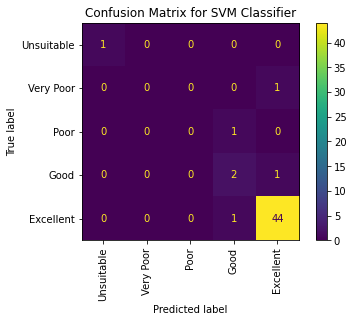

In [12]:
# Using Kernel SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf', random_state = 0)

#Wrapper Feature Selection
sfs_svm = SequentialFeatureSelector(svm_clf, forward=False, k_features="best")
sfs_svm.fit(X_train, y_train)
X_train_svm = sfs_svm.transform(X_train)
X_test_svm = sfs_svm.transform(X_test)

result(svm_clf, "SVM", X_train_svm, X_test_svm)

display(pd.DataFrame.from_dict(sfs_svm.get_metric_dict()).T)
display(sfs_svm.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

,Decision Tree,Random Forest,SVM,Naive Bayes
precision,0.846475,0.829932,0.893009,0.888756
recall,0.882353,0.901961,0.921569,0.921569
f1-score,0.864024,0.864414,0.906486,0.893826
accuracy,0.882353,0.901961,0.921569,0.921569


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9583333333333334, 0.7391304347826086, 0.826...",0.869928,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.106523,0.082878,0.041439
14,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)","[0.9583333333333334, 0.8260869565217391, 0.826...",0.887319,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",0.076355,0.059407,0.029704
13,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14)","[0.9583333333333334, 0.8695652173913043, 0.826...",0.896014,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14)",0.067606,0.0526,0.0263
12,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14)",0.082277,0.064015,0.032007
11,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 13, 14)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 13, 14)",0.082277,0.064015,0.032007
10,"(0, 1, 2, 4, 5, 8, 9, 10, 13, 14)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 8, 9, 10, 13, 14)",0.082277,0.064015,0.032007
9,"(0, 1, 2, 4, 5, 8, 9, 10, 13)","[0.9166666666666666, 0.8695652173913043, 0.826...",0.905072,"(0, 1, 2, 4, 5, 8, 9, 10, 13)",0.065355,0.050849,0.025424
8,"(0, 1, 2, 4, 5, 8, 9, 13)","[0.9166666666666666, 0.8695652173913043, 0.826...",0.905072,"(0, 1, 2, 4, 5, 8, 9, 13)",0.065355,0.050849,0.025424
7,"(0, 1, 2, 4, 5, 8, 13)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 8, 13)",0.082277,0.064015,0.032007
6,"(0, 2, 4, 5, 8, 13)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 2, 4, 5, 8, 13)",0.082277,0.064015,0.032007


('2', '4')

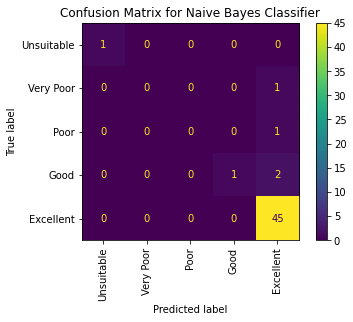

In [13]:
# Using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

#Wrapper Feature Selection
sfs_nb = SequentialFeatureSelector(nb_clf, forward=False, k_features="best")
sfs_nb.fit(X_train, y_train)
X_train_nb = sfs_nb.transform(X_train)
X_test_nb = sfs_nb.transform(X_test)

result(nb_clf, "Naive Bayes", X_train_nb, X_test_nb)

display(pd.DataFrame.from_dict(sfs_nb.get_metric_dict()).T)
display(sfs_nb.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

,Decision Tree,Random Forest,SVM,Naive Bayes,CatBoost
precision,0.846475,0.829932,0.893009,0.888756,0.926897
recall,0.882353,0.901961,0.921569,0.921569,0.960784
f1-score,0.864024,0.864414,0.906486,0.893826,0.942685
accuracy,0.882353,0.901961,0.921569,0.921569,0.960784


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9583333333333334, 0.7391304347826086, 0.826...",0.869928,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.106523,0.082878,0.041439
14,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)","[0.9583333333333334, 0.8260869565217391, 0.826...",0.887319,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",0.076355,0.059407,0.029704
13,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14)","[0.9583333333333334, 0.8695652173913043, 0.826...",0.896014,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14)",0.067606,0.0526,0.0263
12,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14)",0.082277,0.064015,0.032007
11,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 13, 14)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 6, 8, 9, 10, 13, 14)",0.082277,0.064015,0.032007
10,"(0, 1, 2, 4, 5, 8, 9, 10, 13, 14)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 8, 9, 10, 13, 14)",0.082277,0.064015,0.032007
9,"(0, 1, 2, 4, 5, 8, 9, 10, 13)","[0.9166666666666666, 0.8695652173913043, 0.826...",0.905072,"(0, 1, 2, 4, 5, 8, 9, 10, 13)",0.065355,0.050849,0.025424
8,"(0, 1, 2, 4, 5, 8, 9, 13)","[0.9166666666666666, 0.8695652173913043, 0.826...",0.905072,"(0, 1, 2, 4, 5, 8, 9, 13)",0.065355,0.050849,0.025424
7,"(0, 1, 2, 4, 5, 8, 13)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 1, 2, 4, 5, 8, 13)",0.082277,0.064015,0.032007
6,"(0, 2, 4, 5, 8, 13)","[0.9166666666666666, 0.9130434782608695, 0.782...",0.905072,"(0, 2, 4, 5, 8, 13)",0.082277,0.064015,0.032007


('2', '4')

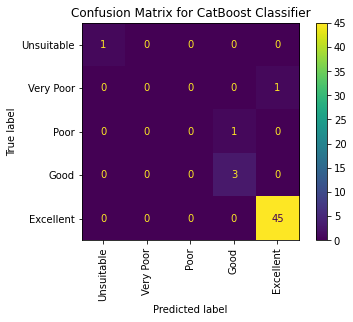

In [14]:
# Using CatBoost Classifier
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(random_seed=42, logging_level='Silent')

#Wrapper Feature Selection
sfs_cb = SequentialFeatureSelector(cb_clf, forward=False, k_features="best")
sfs_cb.fit(X_train, y_train)
X_train_cb = sfs_cb.transform(X_train)
X_test_cb = sfs_cb.transform(X_test)

result(cb_clf, "CatBoost", X_train_cb, X_test_cb)

display(pd.DataFrame.from_dict(sfs_nb.get_metric_dict()).T)
display(sfs_nb.k_feature_names_)